<a href="https://colab.research.google.com/github/emelyck/Metodos_DynnaRangel_SamuelRomero/blob/main/parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

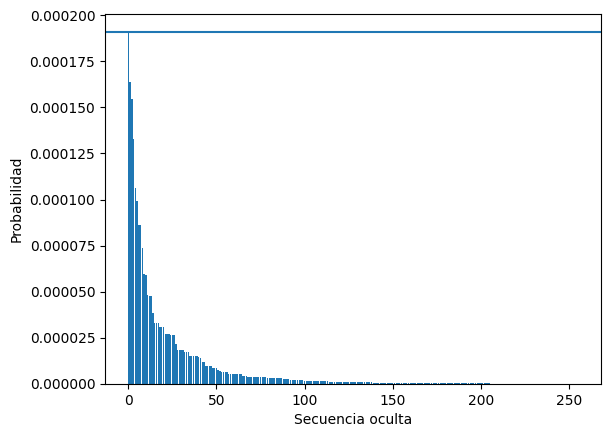

Secuencias más probables que suman 20%:
    Secuencia oculta  probabilidad  probabilidad que se acumula
0           BBBBJJJJ  1.911030e-04                     0.000191
1           JJJJJJJJ  1.638400e-04                     0.000355
2           BBBBJJBB  1.547934e-04                     0.000510
3           JJJJJJBB  1.327104e-04                     0.000642
4           BBBJJJJJ  1.061683e-04                     0.000749
..               ...           ...                          ...
251         BJBJBBBJ  1.658880e-08                     0.002341
252         JBJBJBJB  1.166400e-08                     0.002341
253         BJBJBBJJ  9.216000e-09                     0.002341
254         BJBJBJBJ  5.184000e-09                     0.002341
255         BJBJBBJB  4.147200e-09                     0.002341

[256 rows x 3 columns]
Probabilidad total acumulada: 0.0023407750473984023


In [10]:
#Hidden Markov Models. Problema 1: Casino tramposo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.5], [0.9, 0.1]])
a_priori_pi = np.array([0.2, 0.8])
prob_1 = {'C': 0, 'S': 1}
prob_2 = np.array([prob_1[x] for x in ['S', 'C', 'C', 'C', 'S', 'S', 'C', 'C']])
estado_1 = ['J', 'B']
estado_2 = {'J': 0, 'B': 1}
estado_3 = list(product(estado_1, repeat=len(prob_2)))

def calcular_probabilidad(estado_seq, prob_2, a_priori_pi, T, E):
    e_i = estado_seq[0]
    p_i = a_priori_pi[estado_2[e_i]] * E[estado_2[e_i], prob_2[0]]
    p_t = p_i
    for j in range(1, len(prob_2)):
        estado_anterior = estado_seq[j - 1]
        estado_actual = estado_seq[j]
        transicion = T[estado_2[estado_anterior], estado_2[estado_actual]]
        emision = E[estado_2[estado_actual], prob_2[j]]
        p_t *= transicion * emision
    return p_t
todas_juntas = []
for k in estado_3:
    lista_prob = calcular_probabilidad(k, prob_2, a_priori_pi, T, E)
    secuencia_oculta = ''.join(k)
    tupla = (secuencia_oculta, lista_prob)
    todas_juntas.append(tupla)



organizacion = pd.DataFrame(todas_juntas, columns=['Secuencia oculta', 'probabilidad'])
organizacion = organizacion.sort_values('probabilidad', ascending=False).reset_index(drop=True)
probabilidad_acumulada = organizacion['probabilidad'].cumsum()
organizacion['probabilidad que se acumula'] = probabilidad_acumulada
veinte_orga = organizacion[probabilidad_acumulada <= 0.2]
resultado = organizacion['probabilidad'].sum()


plt.bar(range(len(organizacion['probabilidad'])), organizacion['probabilidad'])
plt.axhline(y=organizacion['probabilidad'].max())
plt.xlabel('Secuencia oculta')
plt.ylabel('Probabilidad')
plt.show()
# g
# podemor cambiar el valor de a_priori_pi, como por ejemplo a_priori_pi = np.array([x, 8-x]), para observar cómo esto afecta el orden de las secuencias más probables.
# h
# Si no se tienen las matrices de transición y emisión definidas de antemano, podemos usar el algoritmo de Baum-Welch para estimarlas a partir de las observaciones. Este método se basa en un enfoque supervisado conocido como Maximización de Expectativas.
print("Secuencias más probables que suman 20%:")
print(veinte_orga)
print(f"Probabilidad total acumulada: {resultado}")

